In [1]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt 
import string
import os
from PIL import Image
import glob
import keras
import tensorflow as tf
from pickle import dump, load
from tqdm import tqdm_notebook as tqdm
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3


from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
from keras.applications.vgg16 import vgg16
from keras.applications.vgg16 import preprocess_input

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
cd drive/My\ Drive/SIH

/content/drive/My Drive/SIH


In [0]:
try:
    import dill as pickle
except ImportError:
    import pickle

In [0]:
# Load the inception v3 model
model = InceptionV3(weights='imagenet')
# model = vgg16(weights='imagenet')

In [0]:
# Create a new model, by removing the last layer (output layer) from the inception v3
model_new = Model(model.input, model.layers[-2].output)

In [0]:
def preprocess(image_path):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = image.load_img(image_path, target_size=(299, 299))
    
    x = image.img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    
    x = preprocess_input(x)
    return x

In [0]:
# Function to encode a given image into a vector of size (2048, )
def encode(image):
    image = preprocess(image) 
    v = model_new.predict(image) 
    v = np.reshape(v, v.shape[1]) 
    return v

In [0]:
garbage = os.listdir('dataset/Garbage') 
nongarbage = os.listdir('dataset/Non-garbage')

In [0]:
for i in range(len(garbage)):
    garbage[i] = 'dataset/Garbage/' + garbage[i]
for i in range(len(nongarbage)):
    nongarbage[i] = 'dataset/Non-garbage/' + nongarbage[i]

In [0]:
len(garbage)

627

In [0]:
encode(garbage[0])

array([0.28326842, 0.27664885, 1.2497922 , ..., 0.14413711, 0.9206516 ,
       0.09905776], dtype=float32)

In [0]:
from tqdm import tqdm_notebook as tqdm

In [0]:
encoded_garbage = a[]
for img in tqdm(garbage):
    encoded_garbage.append(encode(img))

encoded_nongarbage = []
for img in tqdm(nongarbage):
    encoded_nongarbage.append(encode(img))


In [0]:
encoded_garbage[0].shape

(2048,)

In [0]:
Y_garbage = np.ones((len(garbage), 1))
Y_nongarbage = np.zeros((len(nongarbage),1))

In [0]:
Y = np.vstack((Y_garbage,Y_nongarbage)).reshape(-1, )

In [0]:
encoded_garbage_ = np.array(encoded_garbage)
encoded_nongarbage_ = np.array(encoded_nongarbage)

In [0]:
X_ = np.vstack((encoded_garbage_, encoded_nongarbage_))

In [0]:
Y_ = Y.reshape(Y.shape[0], 1)

In [0]:
train_ = np.hstack((X_, Y_))

In [0]:
np.random.shuffle(train_)

In [0]:
train_[1:10,-1]

array([1., 0., 1., 1., 1., 0., 0., 1., 1.])

In [0]:
train_.shape

(1635, 2049)

In [0]:
X = train_[:,:-1]
Y = train_[:,-1]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [0]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [0]:
X_train.shape[1]

2048

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim = 2048))
model.add(Dropout(0.4))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc',f1_m])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

In [0]:
model.fit(X_train, Y_train,
          epochs=100,
          batch_size=batch_size,
          validation_data=(X_test, Y_test))



Train on 1471 samples, validate on 164 samples
Epoch 1/100
1471/1471 [==============================] - 1s 978us/step - loss: 0.6122 - acc: 0.6676 - val_loss: 0.4969 - val_acc: 0.7195
Epoch 2/100
1471/1471 [==============================] - 0s 143us/step - loss: 0.3187 - acc: 0.8933 - val_loss: 0.1848 - val_acc: 0.9390
Epoch 3/100
1471/1471 [==============================] - 0s 176us/step - loss: 0.2037 - acc: 0.9273 - val_loss: 0.1887 - val_acc: 0.9085
Epoch 4/100
1471/1471 [==============================] - 0s 182us/step - loss: 0.1812 - acc: 0.9347 - val_loss: 0.2044 - val_acc: 0.9207
Epoch 5/100
1471/1471 [==============================] - 0s 171us/step - loss: 0.1837 - acc: 0.9266 - val_loss: 0.1462 - val_acc: 0.9207
Epoch 6/100
1471/1471 [==============================] - 0s 145us/step - loss: 0.1675 - acc: 0.9361 - val_loss: 0.1277 - val_acc: 0.9329
Epoch 7/100
1471/1471 [==============================] - 0s 152us/step - loss: 0.1470 - acc: 0.9483 - val_loss: 0.1123 - val_acc:

In [0]:
model.save('Models/my_model.h5')

In [0]:
model_new.save('Models/inception.h5')

In [0]:
encode('abcd.jpg')

array([0.16912109, 0.35877314, 0.82962745, ..., 0.29126427, 0.7881636 ,
       0.7561311 ], dtype=float32)

In [0]:
# Save Train features
with open("Models/model.pkl", "wb") as mn:
    pickle.dump(model, mn)

In [0]:
def predict(filename):
  x = plt.imread(filename)
  plt.imshow(x)
  v = encode(filename)
  pred =  model.predict(v.reshape(1, v.shape[0]))
  if pred[0] == 1:
    return "Garbage in the Image"
  else:
    return "Clean city"

'Garbage in the Image'

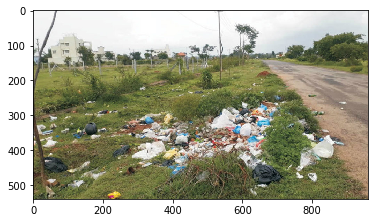

In [0]:
predict("dataset/Garbage/p3-jy23-18.jpg")

sample_data/


'Garbage in the Image'

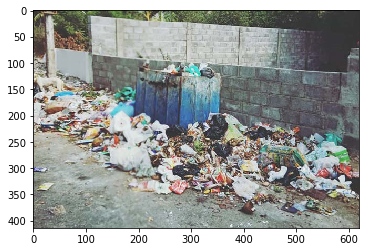

In [0]:
predict('abcd.jpg')